# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [ ]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 1

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Epoch 0: Train Loss 5.9047, Val Loss 5.7132, Train Acc 0.5186, Val Acc 0.5211
Epoch 10: Train Loss 3.8371, Val Loss 4.2244, Train Acc 0.5400, Val Acc 0.5189
Epoch 20: Train Loss 2.3111, Val Loss 2.5697, Train Acc 0.5133, Val Acc 0.4989
Epoch 30: Train Loss 1.3416, Val Loss 1.4913, Train Acc 0.5043, Val Acc 0.5444
Epoch 40: Train Loss 1.1833, Val Loss 1.4196, Train Acc 0.5019, Val Acc 0.5533
Epoch 50: Train Loss 1.0785, Val Loss 1.3657, Train Acc 0.5019, Val Acc 0.5500
Epoch 60: Train Loss 0.9924, Val Loss 1.2943, Train Acc 0.5048, Val Acc 0.5500
Epoch 70: Train Loss 0.9380, Val Loss 1.2202, Train Acc 0.5029, Val Acc 0.5478
Epoch 80: Train Loss 0.9043, Val Loss 1.1486, Train Acc 0.5038, Val Acc 0.5467
Epoch 90: Train Loss 0.8776, Val Loss 1.0840, Train Acc 0.5105, Val Acc 0.5489


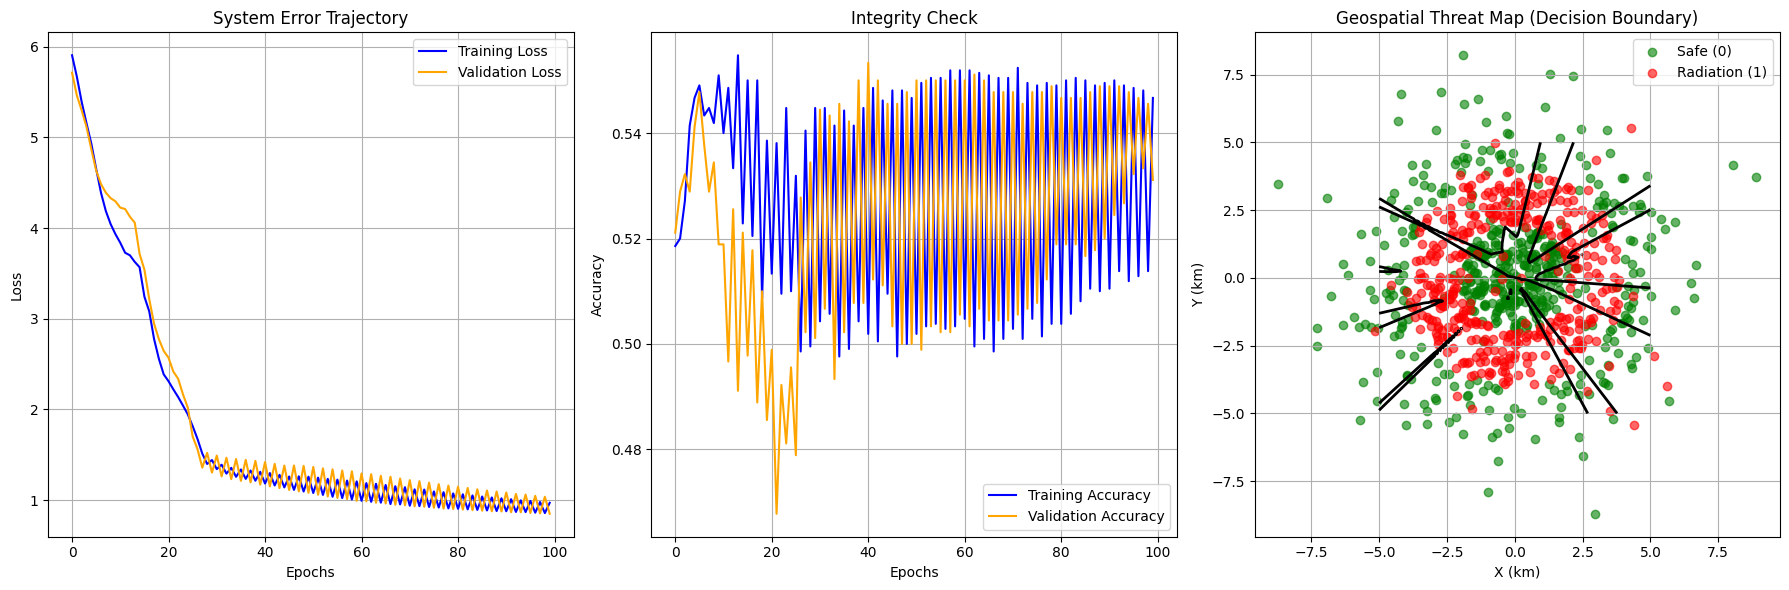

In [4]:
# ==============================================================================
# Code from here. Best of luckk :)
# ==============================================================================
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Group number as random seed
group_number = 14
torch.manual_seed(group_number)

# Generate synthetic data: 3000 points
num_samples = 3000
noise_rate = 0.05

# Generate x, y coordinates (scaled to cover distances up to ~5 km for safety)
x_coords = torch.randn(num_samples) * 2.5
y_coords = torch.randn(num_samples) * 2.5
data = torch.stack([x_coords, y_coords], dim=1)

# Compute distances
distances = torch.sqrt(data[:, 0]**2 + data[:, 1]**2)

# True labels: 1 for Dead Zone (2 < dist < 4), 0 otherwise
true_labels = ((distances > 2) & (distances < 4)).float()

# Add 5% noise: flip labels randomly
noise_mask = torch.rand(num_samples) < noise_rate
labels = true_labels.clone()
labels[noise_mask] = 1 - labels[noise_mask]

# Split into train (70%) and validation (30%)
X_train, X_val, y_train, y_val = train_test_split(data.numpy(), labels.numpy(), test_size=0.3, random_state=group_number)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# Network architecture: 3 hidden layers with 16 neurons each
input_size = 2
hidden_size = 16
output_size = 1

# Initialize weights and biases manually
w1 = torch.randn(input_size, hidden_size, requires_grad=True)
b1 = torch.zeros(hidden_size, requires_grad=True)
w2 = torch.randn(hidden_size, hidden_size, requires_grad=True)
b2 = torch.zeros(hidden_size, requires_grad=True)
w3 = torch.randn(hidden_size, hidden_size, requires_grad=True)
b3 = torch.zeros(hidden_size, requires_grad=True)
w4 = torch.randn(hidden_size, output_size, requires_grad=True)
b4 = torch.zeros(output_size, requires_grad=True)

# Forward pass function
def forward(x):
    h1 = torch.relu(torch.matmul(x, w1) + b1)
    h2 = torch.relu(torch.matmul(h1, w2) + b2)
    h3 = torch.relu(torch.matmul(h2, w3) + b3)
    out = torch.sigmoid(torch.matmul(h3, w4) + b4)
    return out

# Manual Binary Cross Entropy Loss
def bce_loss(y_pred, y_true):
    eps = 1e-7
    y_pred = torch.clamp(y_pred, eps, 1 - eps)
    loss = - (y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred)).mean()
    return loss

# Accuracy function
def accuracy(y_pred, y_true):
    preds = (y_pred > 0.5).float()
    return (preds == y_true).float().mean()

# Training parameters
learning_rate = 0.01
epochs = 100

# Lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
    # Forward pass on training data
    y_pred_train = forward(X_train)
    loss_train = bce_loss(y_pred_train, y_train)

    # Backward pass (autograd)
    loss_train.backward()

    # Manual weight updates (SGD)
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w2 -= learning_rate * w2.grad
        b2 -= learning_rate * b2.grad
        w3 -= learning_rate * w3.grad
        b3 -= learning_rate * b3.grad
        w4 -= learning_rate * w4.grad
        b4 -= learning_rate * b4.grad

        # Zero gradients
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()
        w3.grad.zero_()
        b3.grad.zero_()
        w4.grad.zero_()
        b4.grad.zero_()

    # Validation
    with torch.no_grad():
        y_pred_val = forward(X_val)
        loss_val = bce_loss(y_pred_val, y_val)
        acc_train = accuracy(y_pred_train, y_train)
        acc_val = accuracy(y_pred_val, y_val)

    # Store metrics
    train_losses.append(loss_train.item())
    val_losses.append(loss_val.item())
    train_accuracies.append(acc_train.item())
    val_accuracies.append(acc_val.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss {loss_train.item():.4f}, Val Loss {loss_val.item():.4f}, Train Acc {acc_train.item():.4f}, Val Acc {acc_val.item():.4f}")

# Plotting the 3-Panel HUD
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 1. System Error Trajectory (Loss Plot)
axs[0].plot(train_losses, label='Training Loss', color='blue')
axs[0].plot(val_losses, label='Validation Loss', color='orange')
axs[0].set_title('System Error Trajectory')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# 2. Integrity Check (Accuracy Plot)
axs[1].plot(train_accuracies, label='Training Accuracy', color='blue')
axs[1].plot(val_accuracies, label='Validation Accuracy', color='orange')
axs[1].set_title('Integrity Check')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

# 3. Geospatial Threat Map (Decision Boundary)
# Now We Create a grid for visualization
x_min, x_max = -5, 5
y_min, y_max = -5, 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    grid_preds = forward(grid_points).reshape(xx.shape)

# Plot validation points
safe = y_val.squeeze() == 0
danger = y_val.squeeze() == 1
axs[2].scatter(X_val[safe, 0], X_val[safe, 1], c='green', label='Safe (0)', alpha=0.6)
axs[2].scatter(X_val[danger, 0], X_val[danger, 1], c='red', label='Radiation (1)', alpha=0.6)

# Decision boundary contour at 0.5
axs[2].contour(xx, yy, grid_preds, levels=[0.5], colors='black', linewidths=2)
axs[2].set_title('Geospatial Threat Map (Decision Boundary)')
axs[2].set_xlabel('X (km)')
axs[2].set_ylabel('Y (km)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()